In [2]:
%load_ext autoreload
%autoreload 2
import os
import torch as t
from utils.config import opt
from model import FasterRCNNVGG16
from trainer import FasterRCNNTrainer
from data.util import  read_image
from utils.vis_tool import vis_bbox
from utils import array_tool as at
%matplotlib inline

In [3]:
img = read_image('misc/demo.jpg')
img = t.from_numpy(img)[None]

In [4]:
import os

In [7]:
imgs = os.listdir('../VOCdevkit/VOC2007/JPEGImages')
img = imgs[5]
img = read_image('../VOCdevkit/VOC2007/JPEGImages/' + img)
img = t.from_numpy(img)[None]

In [5]:
faster_rcnn = FasterRCNNVGG16()
trainer = FasterRCNNTrainer(faster_rcnn).cuda()

You'll need to download pretrained model from [google dirve](https://drive.google.com/open?id=1cQ27LIn-Rig4-Uayzy_gH5-cW-NRGVzY) 
# 1. model converted from chainer

/home/sar/fasterrcnn/FasterRcnn_pytorch/model/faster_rcnn.py:236: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img = t.autograd.Variable(at.totensor(img).float()[None], volatile=True)


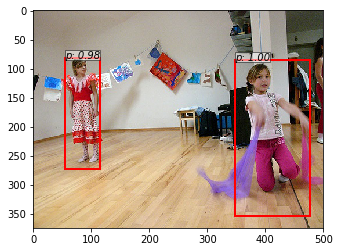

In [5]:
# in this machine the cupy isn't install correctly... 
# so it's a little slow
trainer.load('/home/sar/fasterrcnn/simple-faster-rcnn/chainer_best_model_converted_to_pytorch_0.7053.pth')
opt.caffe_pretrain=True # this model was trained from caffe-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))
# it failed to find the dog, but if you set threshold from 0.7 to 0.6, you'll find it

# 2. model trained with torchvision pretrained model

In [22]:
imgs = os.listdir('../test_data')
img = imgs[4]
img = read_image('../test_data/' + img)
img = t.from_numpy(img)[None]

/home/sar/AnnotatedNetworkModelGit-master/fasterrcnn/FasterRcnn_pytorch/model/faster_rcnn.py:238: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img = t.autograd.Variable(at.totensor(img).float()[None], volatile=True)


[array([[388.7476 , 610.2403 , 462.62527, 735.3648 ],
       [357.73166, 302.92142, 411.5953 , 424.01926]], dtype=float32)]
[array([0, 0], dtype=int32)]
[array([0.7733142 , 0.71567756], dtype=float32)]


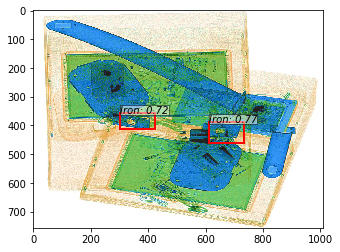

In [23]:
# trainer.load('/home/sar/fasterrcnn/simple-faster-rcnn/chainer_best_model_converted_to_pytorch_0.7053.pth')
trainer.load('/home/sar/AnnotatedNetworkModelGit-master/fasterrcnn/simple-faster-rcnn/best2.pth')

opt.caffe_pretrain=False # this model was trained from torchvision-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
print(_bboxes)
print(_labels)
print(_scores)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))
# it failed to find the dog, but if you set threshold from 0.7 to 0.6, you'll find it

# 3. model trained with caffe pretrained model

In [ ]:
trainer.load('/home/bobo/PycharmProjects/torchProjectss/fasterbychenyun/simplefasterrcnn/fasterrcnn_12222105_0.712649824453_caffe_pretrain.pth')
opt.caffe_pretrain=True # this model was trained from caffe-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))